# A Comparative Study of Machine Learning Algorithms for Fake News Detection

##### Importing the required libraries

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1

##### Initializing required variables

In [2]:
ps = PorterStemmer()
stopwords_set = set(stopwords.words('english'))
pattern = re.compile('[^a-zA-Z]')
stemmed_texts_train = []

Below is a function for test stemming. It takes the following arguments as input:

    'title': Text to be stemmed
    'pattern': A regular expression pattern to be used for removing punctuation and other unwanted characters.
    'stopwords_set': A set of stopwords to be removed from the text.
    'ps': A PorterStemmer object, which is used to perform stemming.

The function first uses the 'pattern' to substitute all punctuation and other unwanted characters with spaces. Then, it converts the text to lowercase and splits it into words. Next, it applies stemming to each word and removes any words that are in the 'stopwords_set'. Finally, it joins the stemmed words back together into a single string and returns it.

In [3]:
def text_stemming(title, pattern, stopwords_set, ps):
    # using the precompiled pattern above for substitution
    title = pattern.sub(' ', title)
    # converting to lowercase and splitting into words
    words = title.lower().split()
    # applying stemming and removing stopwords using the stopwords list
    stemmed_words = [ps.stem(word) for word in words if word not in stopwords_set]
    # joining the stemmed words back into a single string
    stemmed_text = ' '.join(stemmed_words)
    
    return stemmed_text

Below is a function for text preprocessing. It takes following argument as input:

    'df': A pandas DataFrame containing the text data
    
The function first drops any rows that contain missing values. Then, it resets the index of the DataFrame so that the rows are numbered consecutively. Next, it drops the index and id columns from the DataFrame. Finally, it iterates through the title column of the DataFrame and applies the text_stemming function to each text. The output of the text_stemming function is appended to a list of stemmed texts.    

In [4]:
def text_preprocessing(df):
    stemmed_texts_train = []
    df = df.dropna()
    
    # After dropping the NA values certains rows are deleted. 
    # reset_index() method will help to reset the index back to the default numeric index 
    df.reset_index(inplace = True)
    
    # dropping the index and id columns
    df = df.drop(['index', 'id'], axis = 1)
    
#     count = 0
    for title in df['title']:
#         count = count + 1
        stemmed_texts_train.append(text_stemming(title, pattern, stopwords_set, ps))
        
#     print(count)
    y = df['label']
    return stemmed_texts_train, y, df
    

#### Count Vectorizer

Below code is a function for feature extraction. It takes following arguments as input:
    
    'PreProcessed_texts': A list of stemmed texts
        
The function first creates a CountVectorizer object with the following parameters:
    
    'max_features': The maximum number of features to extract
    'ngram_range': The range of n-grams to extract
        
The CountVectorizer object will then be used to extract features from the stemmed texts. The features are represented as a sparse matrix, where each row represents a text and each column represents a feature.

The function returns the CountVectorizer object and the sparse matrix of features.

In [5]:
def feature_extraction(PreProcessed_texts):
    cv = CountVectorizer(max_features = 1000, ngram_range = (1, 3))
    return cv, cv.fit_transform(PreProcessed_texts).toarray()

### Importing training dataset

In [6]:
dataset_train = pd.read_csv('C:/Users/Deepanshu/DA/Final Project - DA/datasets/fake-news/train.csv')

### Text Preprocessing

In [7]:
PreProcessed_texts, y, df = text_preprocessing(dataset_train)

#### Analysing the training dataset

In [8]:
df.label.value_counts()

0    10361
1     7924
Name: label, dtype: int64

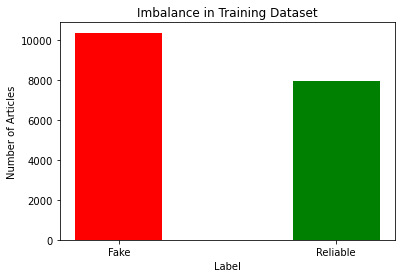

In [9]:
# Get the number of fake and reliable articles
n_fake = len(df[df['label'] == 0])
n_reliable = len(df[df['label'] == 1])

# Create a bar chart of the number of fake and reliable articles
plt.bar(
    ['Fake', 'Reliable'],
    [n_fake, n_reliable],
    color=['red', 'green'],
    width=0.4
)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Number of Articles')
plt.title('Imbalance in Training Dataset')
plt.savefig("Imbalance_training.png")
plt.show()

### Feature Extraction

In [10]:
cv, X = feature_extraction(PreProcessed_texts)

In [11]:
cv.get_feature_names_out()[:20]

array(['abedin', 'abort', 'abus', 'access', 'access pipelin', 'account',
       'accus', 'act', 'action', 'activ', 'activist', 'ad', 'add',
       'address', 'administr', 'admit', 'advis', 'african', 'age',
       'agenc'], dtype=object)

In [12]:
dataframe_train = pd.DataFrame(X, columns = cv.get_feature_names_out())
dataframe_train

,abedin,abort,abus,access,access pipelin,account,accus,act,action,activ,...,wrong,year,year new,year old,yemen,york,york time,young,zika,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
18282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
18283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting dataset into train set and validation set

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.30, random_state = 0, stratify = y)

### Implementing different algorithms

#### Passive Aggressive Classifier algorithm

In [15]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [16]:
PAC = PassiveAggressiveClassifier(max_iter = 50)

In [17]:
PAC.fit(X_train, y_train)
y_pred_pac = PAC.predict(X_val)

#### Support Vector Machine

In [18]:
from sklearn.svm import LinearSVC

In [19]:
SVM = LinearSVC()

In [20]:
SVM.fit(X_train, y_train)
y_pred_svm = SVM.predict(X_val)

#### MultinomialNB Algorithm

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
MNB = MultinomialNB()

In [23]:
MNB.fit(X_train, y_train)
y_pred_mnb = MNB.predict(X_val)

### Calculating Accuracy for validation set

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_pac = accuracy_score(y_val, y_pred_pac)
print("Accuracy: ", accuracy_pac)
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print("Accuracy: ", accuracy_svm)
accuracy_mnb = accuracy_score(y_val, y_pred_mnb)
print("Accuracy: ", accuracy_mnb)

Accuracy:  0.8971928545388261
Accuracy:  0.9214363835216915
Accuracy:  0.8827925628873496


In [26]:
# scores for Passive Aggressive Classifier
accuracy_pac = accuracy_score(y_val, y_pred_pac)
precision_pac = precision_score(y_val, y_pred_pac)
recall_pac = recall_score(y_val, y_pred_pac)
f1_score_pac = f1_score(y_val, y_pred_pac)

# scores for Support Vector Machine
accuracy_svm = accuracy_score(y_val, y_pred_svm)
precision_svm = precision_score(y_val, y_pred_svm)
recall_svm = recall_score(y_val, y_pred_svm)
f1_score_svm = f1_score(y_val, y_pred_svm)

# scores for MultinomialNB
accuracy_mnb = accuracy_score(y_val, y_pred_mnb)
precision_mnb = precision_score(y_val, y_pred_mnb)
recall_mnb = recall_score(y_val, y_pred_mnb)
f1_score_mnb = f1_score(y_val, y_pred_mnb)

In [27]:
# Create a dataframe to store the scores
scores = pd.DataFrame({
    'Algorithm': ['PassiveAggressiveClassifier', 'LinearSVC', 'MultinomialNB'],
    'Accuracy': [accuracy_pac, accuracy_svm, accuracy_mnb],
    'Precision': [precision_pac, precision_svm, precision_mnb],
    'Recall': [recall_pac, recall_svm, recall_mnb],
    'F1-score': [f1_score_pac, f1_score_svm, f1_score_mnb]
})

In [28]:
scores

,Algorithm,Accuracy,Precision,Recall,F1-score
0,PassiveAggressiveClassifier,0.897193,0.903427,0.854018,0.878028
1,LinearSVC,0.921436,0.884889,0.941102,0.912130
2,MultinomialNB,0.882793,0.835267,0.908708,0.870441


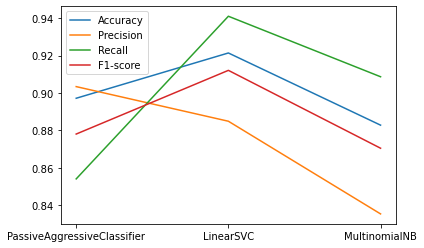

In [29]:
# Plot the scores
plt.figure()
plt.plot(scores['Algorithm'], scores['Accuracy'], label='Accuracy')
plt.plot(scores['Algorithm'], scores['Precision'], label='Precision')
plt.plot(scores['Algorithm'], scores['Recall'], label='Recall')
plt.plot(scores['Algorithm'], scores['F1-score'], label='F1-score')
plt.legend();
plt.savefig("performance_validationset.png")
plt.show()

### Preparing test dataset

In [30]:
dataset_test = pd.read_csv('C:/Users/Deepanshu/DA/Final Project - DA/datasets/fake-news/test.csv')

In [31]:
dataset_submit = pd.read_csv('C:/Users/Deepanshu/DA/Final Project - DA/datasets/fake-news/submit.csv')

In [32]:
df_test = pd.DataFrame(dataset_test)

In [33]:
df_submit = pd.DataFrame(dataset_submit)

In [34]:
dataset_test = pd.merge(df_test, df_submit)

In [35]:
dataset_test

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1
...,...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,0
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,1
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,0
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...,1


### Preprocessing test dataset

In [36]:
PreProcessed_texts, y_test, df_test = text_preprocessing(dataset_test)

#### Analysing the testing dataset

In [37]:
df_test.label.value_counts()

1    2362
0    2213
Name: label, dtype: int64

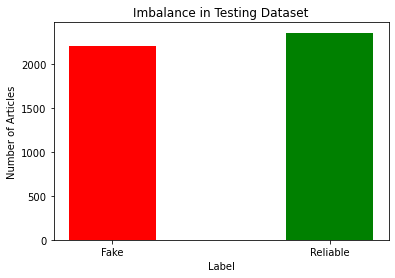

In [38]:
# Get the number of fake and reliable articles
n_fake = len(df_test[df_test['label'] == 0])
n_reliable = len(df_test[df_test['label'] == 1])

# Create a bar chart of the number of fake and reliable articles
plt.bar(
    ['Fake', 'Reliable'],
    [n_fake, n_reliable],
    color=['red', 'green'],
    width=0.4
)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Number of Articles')
plt.title('Imbalance in Testing Dataset')
plt.savefig("imbalance_testing.png")
plt.show()

### Feature Extraction on test dataset

In [39]:
cv, X_test = feature_extraction(PreProcessed_texts) 

In [40]:
cv.get_feature_names_out()[:20]

array(['abort', 'abus', 'accept', 'access', 'account', 'accus', 'across',
       'act', 'action', 'activ', 'activist', 'actual', 'ad', 'administr',
       'admit', 'advanc', 'afghan', 'age', 'agenc', 'agenda'],
      dtype=object)

In [41]:
dataframe_test = pd.DataFrame(X_test, columns = cv.get_feature_names_out())

In [42]:
dataframe_test

,abort,abus,accept,access,account,accus,across,act,action,activ,...,writer,wrong,year,year old,yemen,york,york time,young,youtub,zika
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4572,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [43]:
y_pred_pac_test = PAC.predict(X_test)

In [44]:
y_pred_svm_test = SVM.predict(X_test)

In [45]:
y_pred_mnb_test = MNB.predict(X_test)

### Calculating accuracies on test dataset

In [46]:
accuracy_pac = accuracy_score(y_test, y_pred_pac_test)
print("Accuracy: ", accuracy_pac)
accuracy_svm = accuracy_score(y_test, y_pred_svm_test)
print("Accuracy: ", accuracy_svm)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb_test)
print("Accuracy: ", accuracy_mnb)

Accuracy:  0.6351912568306011
Accuracy:  0.6500546448087432
Accuracy:  0.7020765027322404


In [47]:
# scores for Passive Aggressive Classifier
accuracy_pac = accuracy_score(y_test, y_pred_pac_test)
precision_pac = precision_score(y_test, y_pred_pac_test)
recall_pac = recall_score(y_test, y_pred_pac_test)
f1_score_pac = f1_score(y_test, y_pred_pac_test)

# scores for Support Vector Machine
accuracy_svm = accuracy_score(y_test, y_pred_svm_test)
precision_svm = precision_score(y_test, y_pred_svm_test)
recall_svm = recall_score(y_test, y_pred_svm_test)
f1_score_svm = f1_score(y_test, y_pred_svm_test)

# scores for MultinomialNB
accuracy_mnb = accuracy_score(y_test, y_pred_mnb_test)
precision_mnb = precision_score(y_test, y_pred_mnb_test)
recall_mnb = recall_score(y_test, y_pred_mnb_test)
f1_score_mnb = f1_score(y_test, y_pred_mnb_test)

In [48]:
# Create a dataframe to store the scores
scores1 = pd.DataFrame({
    'Algorithm': ['PassiveAggressiveClassifier', 'LinearSVC', 'MultinomialNB'],
    'Accuracy': [accuracy_pac, accuracy_svm, accuracy_mnb],
    'Precision': [precision_pac, precision_svm, precision_mnb],
    'Recall': [recall_pac, recall_svm, recall_mnb],
    'F1-score': [f1_score_pac, f1_score_svm, f1_score_mnb]
})

In [49]:
scores1

,Algorithm,Accuracy,Precision,Recall,F1-score
0,PassiveAggressiveClassifier,0.635191,0.655590,0.618120,0.636304
1,LinearSVC,0.650055,0.645174,0.715919,0.678708
2,MultinomialNB,0.702077,0.708038,0.719729,0.713836


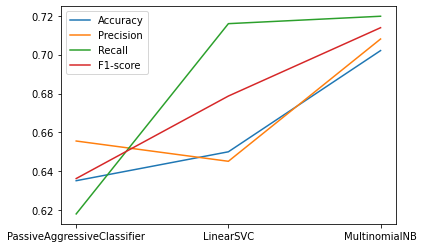

In [50]:
# Plot the scores
plt1.figure()
plt1.plot(scores1['Algorithm'], scores1['Accuracy'], label='Accuracy')
plt1.plot(scores1['Algorithm'], scores1['Precision'], label='Precision')
plt1.plot(scores1['Algorithm'], scores1['Recall'], label='Recall')
plt1.plot(scores1['Algorithm'], scores1['F1-score'], label='F1-score')
plt1.legend();
plt1.savefig("performance_unseendata.png")
plt1.show()

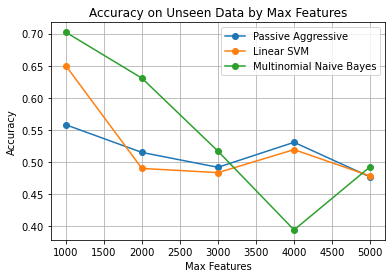

In [62]:
import matplotlib.pyplot as plt

# Data
algorithms = ['Passive Aggressive', 'Linear SVM', 'Multinomial Naive Bayes']
max_features = [1000, 2000, 3000, 4000, 5000]
accuracy_data = [
    [0.558033, 0.514973, 0.491803, 0.530710, 0.476721],
    [0.650055, 0.490055, 0.483497, 0.519344, 0.478251],
    [0.702077, 0.630601, 0.516940, 0.394317, 0.492678]
]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Plot data for each algorithm
for i, algorithm_data in enumerate(accuracy_data):
    ax.plot(max_features, algorithm_data, marker='o', label=algorithms[i])

# Set labels and title
ax.set_xlabel('Max Features')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy on Unseen Data by Max Features')

# Add a legend
ax.legend()


# Show the plot
plt.grid()
plt.savefig("performance_diff_features_plot.png")
plt.show()